In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('RR_Project_data_30Y.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

         Date  SP500  SP500 RoR  Consumer Price Index  \
0      1/1/70  90.31  -0.008781                  37.9   
1      2/1/70  87.16  -0.034880                  38.1   
2  01.03.1970  88.65   0.017095                  38.3   
3  01.04.1970  85.95  -0.030457                  38.5   
4  01.05.1970  76.06  -0.115067                  38.6   

   Industrial Production: Total Index  Unemployment Rate  \
0                                3201                3.9   
1                                3453                4.2   
2                                3635                4.4   
3                                3797                4.6   
4                                3919                4.8   

   Unemployment Level (thousands of Persons)  Employment Level  \
0                                       3201             78780   
1                                       3453             78698   
2                                       3635             78863   
3                               

In [4]:
# Feature selection
features = [  'Consumer Price Index', 
    'Industrial Production: Total Index', 
    'Unemployment Rate', 
    'Employment Level', 
    'All Employees, Total Nonfarm', 
    'Labor Force Participation Rate', 
    'Personal Consumption Expenditures', 
    'Real Disposable Personal Income', 
    'Spot Crude Oil Price: West Texas Intermediate (WTI)', 
    'Motor Vehicle Retail Sales: Domestic Autos']
X = df[features]
y = df['SP500 RoR']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [7]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0013376662090288593
R^2 Score: -0.28822512934290434


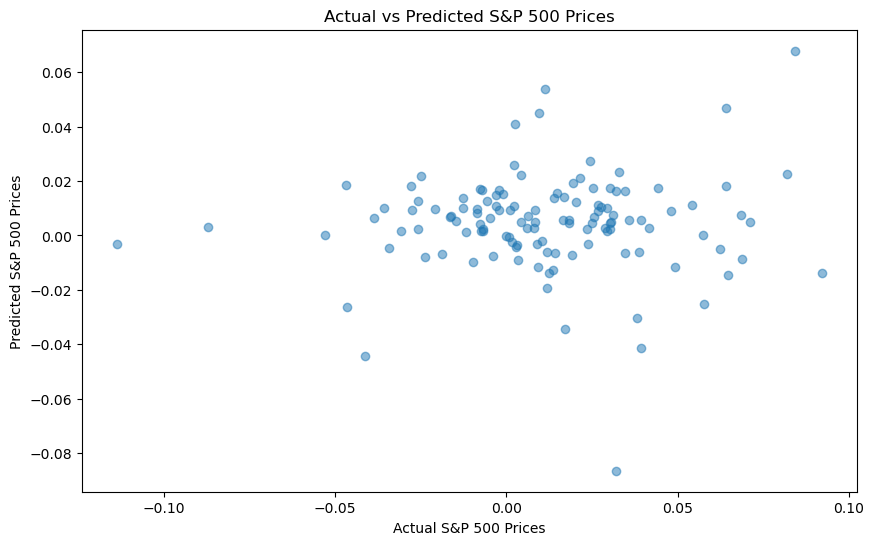

In [11]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual S&P 500 Prices")
plt.ylabel("Predicted S&P 500 Prices")
plt.title("Actual vs Predicted S&P 500 Prices")
plt.show()

In [14]:
# Evaluate the model
rf_r2 = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)

In [15]:
# Define the characteristics and their values
rf_characteristics = {
    'Name of characteristics': [
        'Model name',
        'Model type',
        'Train - test split*',
        'Datapoints in train dataset',
        'Datapoints in test dataset',
        'R²',
        'MSE'
    ],
    'Characteristics': [
        'ML Regression model',
        'Random Forest Regressor',
        '20 %',
        len(X_train),  # Number of datapoints in the training set
        len(X_test),   # Number of datapoints in the test set
        f'{rf_r2:.2%}',  # R² value as a percentage
        f'{rf_mse:.4f}'   # MSE value formatted to 4 decimal places
    ]
}

# Create a DataFrame
rf_summary_df = pd.DataFrame(rf_characteristics)

# Display the DataFrame
print(rf_summary_df)

       Name of characteristics          Characteristics
0                   Model name      ML Regression model
1                   Model type  Random Forest Regressor
2          Train - test split*                     20 %
3  Datapoints in train dataset                      489
4   Datapoints in test dataset                      123
5                           R²                  -28.82%
6                          MSE                   0.0013
